## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
# !wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [2]:
import numpy as np
import pandas as pd

In [3]:
file_name="//wsl$/Ubuntu/home/tancredir/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.


In [4]:
data.shape
N = np.random.randint(1e4, data.shape[0])
print(f"N chosen is {N}")
df = data[:N].copy()

N chosen is 894014


In [5]:
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
894009,1,0,104,3869208299,2689,26
894010,1,1,6,3869208299,2833,23
894011,1,1,139,3869208299,2841,0
894012,1,1,5,3869208299,2838,18


2\. Find out the number of BX in a ORBIT (the value 'x').

In [6]:
x = df["BX_COUNTER"].max() + 1 # (x+1) BX_COUNTER = 1 ORBIT_CNT
print(x)

3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [7]:
time_TDC = 25/30 # time (in ns) for each unit of TDC_MEAS
time_BX  = 25    # time (in ns) for each unit of BX_COUNTER
range_bx  = x
range_tdc = df["TDC_MEAS"].max() + 1
min_orbit = df["ORBIT_CNT"].min()
range_orbit = df["ORBIT_CNT"].max()-min_orbit

time_single_orbit = (range_bx*time_BX)*(range_tdc*time_TDC)
time_data_taking  = time_single_orbit*range_orbit
print(f'data taking is esteemed to be of {time_data_taking} ns')

data taking is esteemed to be of 18114030000.0 ns


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [8]:
df['abs_time'] = pd.Series( data['BX_COUNTER'] * time_BX + data['TDC_MEAS']*time_TDC + data['ORBIT_CNT']*time_single_orbit , index = df.index)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,1,0,123,3869200167,2374,26,8.618643e+15
1,1,0,124,3869200167,2374,27,8.618643e+15
2,1,0,63,3869200167,2553,28,8.618643e+15
3,1,0,64,3869200167,2558,19,8.618643e+15
4,1,0,64,3869200167,2760,25,8.618643e+15
...,...,...,...,...,...,...,...
894009,1,0,104,3869208299,2689,26,8.618661e+15
894010,1,1,6,3869208299,2833,23,8.618661e+15
894011,1,1,139,3869208299,2841,0,8.618661e+15
894012,1,1,5,3869208299,2838,18,8.618661e+15


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [9]:
df['HEAD'] = pd.Series( np.random.randint(low=0,high=2, size=N), index=df.index)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
0,0,0,123,3869200167,2374,26,8.618643e+15
1,1,0,124,3869200167,2374,27,8.618643e+15
2,1,0,63,3869200167,2553,28,8.618643e+15
3,1,0,64,3869200167,2558,19,8.618643e+15
4,0,0,64,3869200167,2760,25,8.618643e+15
...,...,...,...,...,...,...,...
894009,1,0,104,3869208299,2689,26,8.618661e+15
894010,0,1,6,3869208299,2833,23,8.618661e+15
894011,0,1,139,3869208299,2841,0,8.618661e+15
894012,1,1,5,3869208299,2838,18,8.618661e+15


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [10]:
new_df = df[df['HEAD'] == 1]
new_df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,abs_time
1,1,0,124,3869200167,2374,27,8.618643e+15
2,1,0,63,3869200167,2553,28,8.618643e+15
3,1,0,64,3869200167,2558,19,8.618643e+15
5,1,0,63,3869200167,2762,4,8.618643e+15
6,1,0,61,3869200167,2772,14,8.618643e+15
...,...,...,...,...,...,...,...
894006,1,0,58,3869208299,2686,2,8.618661e+15
894008,1,0,89,3869208299,2696,7,8.618661e+15
894009,1,0,104,3869208299,2689,26,8.618661e+15
894012,1,1,5,3869208299,2838,18,8.618661e+15


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

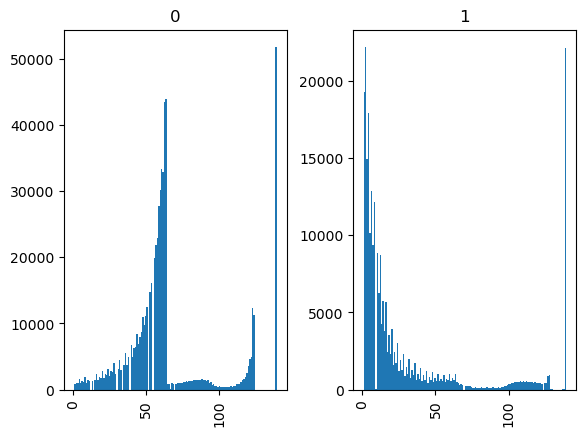

In [11]:
df.hist(column='TDC_CHANNEL', by='FPGA', bins = 140);  # separate the histograms

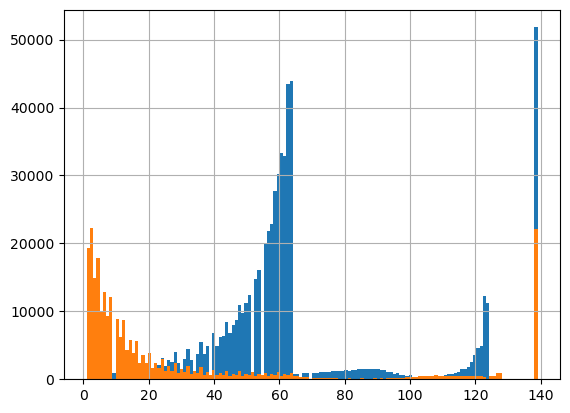

In [12]:
(df.groupby("FPGA"))["TDC_CHANNEL"].hist(bins = 140);  # plot on the same histogram but with different colors

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [13]:
nois = df['TDC_CHANNEL'].value_counts()
nois[:3]

139    73951
64     44883
63     44112
Name: TDC_CHANNEL, dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [14]:
# count the number of unique orbits
unique_orbits = len(df['ORBIT_CNT'].unique()) # or by using .nunique() method
print(f"There are {unique_orbits} unique orbits")

# count the number of unique orbits with at least one measurement for TDC_CHANNEL = 139
unique_orbits_mask = len(df[df['TDC_CHANNEL'] >= 139]['ORBIT_CNT'].unique())
print(f"There are {unique_orbits_mask} unique orbits with at least one measurement for TDC_CHANELL = 139")

There are 8129 unique orbits
There are 8104 unique orbits with at least one measurement for TDC_CHANELL = 139
